In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:

df_1year = pd.read_csv('data_1year.csv', index_col=0).reindex()
df_1year = df_1year.rename(columns={ 
                                    '1y_ret':'y1_ret',
                                    '1y_ret_ward_y':'y1_ret_ward_y'
                                   })

#load respective features
df_data_1year = pd.read_excel('data_1year_features.xlsx', index_col=0)
#df_data_1year = df_data_1year.drop(['Ward'], axis=1)
#df_data_1year['crime_low'] =0
df_data_1year.columns

Index(['1y_ret', '1y_ret_ward', 'Price', 'Year', 'Type', 'Ward',
       'Number of Parks', 'Number of Primary Schools',
       'Primary School AVG Rating', 'Number of Secondary Schools',
       'Secondary School AVG Rating', 'Number of Post 16 Schools',
       'Post 16 School AVG Rating', 'Number of Healthcare Services',
       'Number of Dentistries', 'Number of High Severity Crimes Previous Year',
       'Number of Low Severity Crimes Previous Year'],
      dtype='object')

In [3]:
df_1year

,y1_ret,1y_ret_ward,Price,Year,Type,Ward
16,0.102282,0.092857,765000.0,2011,D,Claygate
32,0.131559,0.160131,887500.0,2012,D,Claygate
48,-0.024570,0.030986,915000.0,2013,D,Claygate
64,0.019845,0.133880,1037500.0,2014,D,Claygate
80,-0.033906,-0.002410,1035000.0,2015,D,Claygate
...,...,...,...,...,...,...
703,0.223802,0.244211,591000.0,2017,T,Weybridge St George's Hill
719,-0.048127,-0.043993,565000.0,2018,T,Weybridge St George's Hill
735,-0.097640,-0.101770,507500.0,2019,T,Weybridge St George's Hill
751,0.088065,0.128079,572500.0,2020,T,Weybridge St George's Hill


In [4]:
df_data_1year.describe()

,1y_ret,1y_ret_ward,Price,Year,Number of Parks,Number of Primary Schools,Primary School AVG Rating,Number of Secondary Schools,Secondary School AVG Rating,Number of Post 16 Schools,Post 16 School AVG Rating,Number of Healthcare Services,Number of Dentistries,Number of High Severity Crimes Previous Year,Number of Low Severity Crimes Previous Year
count,704.000000,704.000000,7.040000e+02,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.018754,0.060116,5.900300e+05,2016.000000,13.000000,3.000000,1.791667,1.000000,0.250000,0.875000,0.187500,1.312500,2.312500,194.568182,639.477273
std,0.215321,0.218484,3.227551e+05,3.164526,11.829995,1.061414,0.863627,1.118829,1.437162,0.696465,1.380235,1.402725,2.593144,118.427131,326.404316
min,-0.772701,-0.790882,1.250000e+05,2011.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,16.000000
25%,-0.066136,-0.036028,3.571250e+05,2013.000000,7.000000,2.000000,1.625000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,130.000000,436.250000
50%,0.001865,0.039602,4.952488e+05,2016.000000,9.000000,3.000000,2.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,2.000000,199.500000,626.500000
75%,0.073964,0.127960,7.086875e+05,2019.000000,14.750000,3.250000,2.000000,1.000000,2.000000,1.000000,2.000000,2.250000,3.250000,261.250000,852.500000
max,2.223075,2.253333,1.700000e+06,2021.000000,52.000000,5.000000,3.000000,4.000000,2.000000,2.000000,2.000000,4.000000,10.000000,490.000000,1541.000000


In [5]:
# column_low = [ 'Number of crimes: Anti-social behaviour',
#  'Number of crimes: Other theft',
#  'Number of crimes: Drugs', 
#  'Number of crimes: Public order',
#  'Number of crimes: Theft from the person',
# 'Number of crimes: Other crime',
# 'Number of crimes: Shoplifting',
# 'Number of crimes: Bicycle theft',
#  'Number of crimes: Crime Type N/A'
# ]
# df_data_1year['crime_low'] = df_data_1year[column_low].sum(axis=1)

# column_high = [ 'Number of crimes: Vehicle crime',
#  'Number of crimes: Violent crime', 
#  'Number of crimes: Burglary', 
#  'Number of crimes: Criminal damage and arson',
#  'Number of crimes: Public disorder and weapons',
#  'Number of crimes: Violence and sexual offences',
#  'Number of crimes: Possession of weapons',
# 'Number of crimes: Robbery'
# ]
# df_data_1year['crime_high'] =  df_data_1year[column_high].sum(axis=1)

df_data_1year = df_data_1year.rename(columns={
                                    'Number of Primary Schools':'Num_Primary_Schools',
                                    'Primary School AVG Rating':'Primary_School_AVG_Rating',
                                    'Number of Secondary Schools':'Num_Secondary_Schools',
                                    'Secondary School AVG Rating':'Secondary_School_AVG_Rating',
                                    'Number of Post 16 Schools':'Num_Post_16_Schools',
                                    'Post 16 School AVG Rating':'Post_16_School_AVG_Rating',
                                    'Number of High Severity Crimes Previous Year':'Number_of_High_Severity_Crimes_Previous_Year',
                                   'Number of Low Severity Crimes Previous Year':'Number_of_Low_Severity_Crimes_Previous_Year',
                                    'Number of Parks':'Number_of_Parks',
                                    'Number of Dentistries':'Number_of_Dentistries',
                                    'Number of Healthcare Services':'Number_of_Healthcare_Services'
                                   })



In [6]:
#merge datasets
df_1year.head()
df = pd.merge(df_1year, df_data_1year, on=['Ward', 'Type', 'Year'])
 #drop columns not needed for predictions
df = df.drop(['Ward', '1y_ret_ward_x', '1y_ret', 'Price_x'
#               'Number of crimes: Vehicle crime',
#  'Number of crimes: Violent crime', 
#  'Number of crimes: Burglary', 
#  'Number of crimes: Criminal damage and arson',
#  'Number of crimes: Public disorder and weapons',
#  'Number of crimes: Violence and sexual offences',
#  'Number of crimes: Possession of weapons',
# 'Number of crimes: Robbery',
#  'Number of crimes: Anti-social behaviour',
#  'Number of crimes: Other theft',
#  'Number of crimes: Drugs', 
#  'Number of crimes: Public order',
#  'Number of crimes: Theft from the person',
# 'Number of crimes: Other crime',
# 'Number of crimes: Shoplifting',
# 'Number of crimes: Bicycle theft',
#  'Number of crimes: Crime Type N/A', 
], axis=1)
df

,y1_ret,Year,Type,1y_ret_ward_y,Price_y,Number_of_Parks,Num_Primary_Schools,Primary_School_AVG_Rating,Num_Secondary_Schools,Secondary_School_AVG_Rating,Num_Post_16_Schools,Post_16_School_AVG_Rating,Number_of_Healthcare_Services,Number_of_Dentistries,Number_of_High_Severity_Crimes_Previous_Year,Number_of_Low_Severity_Crimes_Previous_Year
0,0.102282,2011,D,0.092857,765000.0,5,2,3.0,0,-1,0,-1,0,4,10,26
1,0.131559,2012,D,0.160131,887500.0,5,2,3.0,0,-1,0,-1,0,4,153,291
2,-0.024570,2013,D,0.030986,915000.0,5,2,3.0,0,-1,0,-1,0,4,134,433
3,0.019845,2014,D,0.133880,1037500.0,5,2,3.0,0,-1,0,-1,0,4,101,371
4,-0.033906,2015,D,-0.002410,1035000.0,5,2,3.0,0,-1,0,-1,0,4,121,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.223802,2017,T,0.244211,591000.0,10,3,2.0,2,-1,1,-1,1,0,239,625
700,-0.048127,2018,T,-0.043993,565000.0,10,3,2.0,2,-1,1,-1,1,0,277,715
701,-0.097640,2019,T,-0.101770,507500.0,10,3,2.0,2,-1,1,-1,1,0,255,702
702,0.088065,2020,T,0.128079,572500.0,10,3,2.0,2,-1,1,-1,1,0,141,658


In [7]:
df['Type_D'] = [1 if x == 'D' else 0 for x in df['Type']]
df['Type_S'] = [1 if x == 'S' else 0 for x in df['Type']]
df['Type_T'] = [1 if x == 'T' else 0 for x in df['Type']]
df['Type_F'] = [1 if x == 'F' else 0 for x in df['Type']]


In [8]:
df=df.drop(['Type'], axis=1)
df = df.rename(columns={'1y_ret_ward_y':'y1_ret_ward_y'})
df

,y1_ret,Year,y1_ret_ward_y,Price_y,Number_of_Parks,Num_Primary_Schools,Primary_School_AVG_Rating,Num_Secondary_Schools,Secondary_School_AVG_Rating,Num_Post_16_Schools,Post_16_School_AVG_Rating,Number_of_Healthcare_Services,Number_of_Dentistries,Number_of_High_Severity_Crimes_Previous_Year,Number_of_Low_Severity_Crimes_Previous_Year,Type_D,Type_S,Type_T,Type_F
0,0.102282,2011,0.092857,765000.0,5,2,3.0,0,-1,0,-1,0,4,10,26,1,0,0,0
1,0.131559,2012,0.160131,887500.0,5,2,3.0,0,-1,0,-1,0,4,153,291,1,0,0,0
2,-0.024570,2013,0.030986,915000.0,5,2,3.0,0,-1,0,-1,0,4,134,433,1,0,0,0
3,0.019845,2014,0.133880,1037500.0,5,2,3.0,0,-1,0,-1,0,4,101,371,1,0,0,0
4,-0.033906,2015,-0.002410,1035000.0,5,2,3.0,0,-1,0,-1,0,4,121,342,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.223802,2017,0.244211,591000.0,10,3,2.0,2,-1,1,-1,1,0,239,625,0,0,1,0
700,-0.048127,2018,-0.043993,565000.0,10,3,2.0,2,-1,1,-1,1,0,277,715,0,0,1,0
701,-0.097640,2019,-0.101770,507500.0,10,3,2.0,2,-1,1,-1,1,0,255,702,0,0,1,0
702,0.088065,2020,0.128079,572500.0,10,3,2.0,2,-1,1,-1,1,0,141,658,0,0,1,0


In [9]:
#sns.pairplot(df)
df

,y1_ret,Year,y1_ret_ward_y,Price_y,Number_of_Parks,Num_Primary_Schools,Primary_School_AVG_Rating,Num_Secondary_Schools,Secondary_School_AVG_Rating,Num_Post_16_Schools,Post_16_School_AVG_Rating,Number_of_Healthcare_Services,Number_of_Dentistries,Number_of_High_Severity_Crimes_Previous_Year,Number_of_Low_Severity_Crimes_Previous_Year,Type_D,Type_S,Type_T,Type_F
0,0.102282,2011,0.092857,765000.0,5,2,3.0,0,-1,0,-1,0,4,10,26,1,0,0,0
1,0.131559,2012,0.160131,887500.0,5,2,3.0,0,-1,0,-1,0,4,153,291,1,0,0,0
2,-0.024570,2013,0.030986,915000.0,5,2,3.0,0,-1,0,-1,0,4,134,433,1,0,0,0
3,0.019845,2014,0.133880,1037500.0,5,2,3.0,0,-1,0,-1,0,4,101,371,1,0,0,0
4,-0.033906,2015,-0.002410,1035000.0,5,2,3.0,0,-1,0,-1,0,4,121,342,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.223802,2017,0.244211,591000.0,10,3,2.0,2,-1,1,-1,1,0,239,625,0,0,1,0
700,-0.048127,2018,-0.043993,565000.0,10,3,2.0,2,-1,1,-1,1,0,277,715,0,0,1,0
701,-0.097640,2019,-0.101770,507500.0,10,3,2.0,2,-1,1,-1,1,0,255,702,0,0,1,0
702,0.088065,2020,0.128079,572500.0,10,3,2.0,2,-1,1,-1,1,0,141,658,0,0,1,0


In [10]:
#split the data into training and test sets
X = df.drop(['y1_ret','y1_ret_ward_y', 'Price_y'], axis=1)
y = df['y1_ret_ward_y']
print(X)

     Year  Number_of_Parks  Num_Primary_Schools  Primary_School_AVG_Rating  \
0    2011                5                    2                        3.0   
1    2012                5                    2                        3.0   
2    2013                5                    2                        3.0   
3    2014                5                    2                        3.0   
4    2015                5                    2                        3.0   
..    ...              ...                  ...                        ...   
699  2017               10                    3                        2.0   
700  2018               10                    3                        2.0   
701  2019               10                    3                        2.0   
702  2020               10                    3                        2.0   
703  2021               10                    3                        2.0   

     Num_Secondary_Schools  Secondary_School_AVG_Rating  Num_Po

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [12]:
#feature normalization
# scaler = StandardScaler().fit(X_train_raw)
# X_train = scaler.transform(X_train_raw)
# X_test = scaler.transform(X_test_raw)
print (len(X_train),len(y_train), len(X_test), len(y_test))

492 492 212 212


# Linear Regression Model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)

[-4.01708179e-03  5.12833175e-04  6.51307019e-03  1.92788639e-03
  3.77980302e-02 -4.96491590e-02 -6.31216000e-02  6.62110297e-02
  4.18164199e-03  4.58828309e-03 -3.47543977e-06  1.90627990e-05
 -1.33386281e-02 -2.49334078e-03  1.42157771e-02  1.61619180e-03]


In [14]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
Year,-0.004017
Number_of_Parks,0.000513
Num_Primary_Schools,0.006513
Primary_School_AVG_Rating,0.001928
Num_Secondary_Schools,0.037798
Secondary_School_AVG_Rating,-0.049649
Num_Post_16_Schools,-0.063122
Post_16_School_AVG_Rating,0.066211
Number_of_Healthcare_Services,0.004182
Number_of_Dentistries,0.004588


In [15]:
predictions = model.predict(X_test)


Here’s the scatterplot that this code generates:

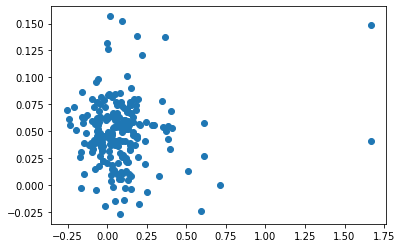

In [16]:
plt.scatter(y_test, predictions)

(array([ 29., 110.,  57.,   9.,   4.,   1.,   0.,   0.,   0.,   2.]),
 array([-0.32718226, -0.13191058,  0.06336109,  0.25863277,  0.45390445,
         0.64917613,  0.8444478 ,  1.03971948,  1.23499116,  1.43026283,
         1.62553451]),
 <a list of 10 Patch objects>)

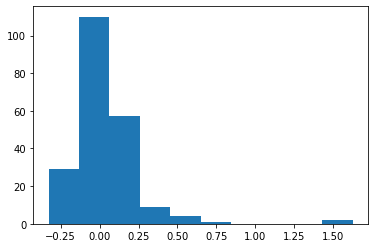

In [17]:
plt.hist(y_test - predictions)

In [18]:
df.corr()

,y1_ret,Year,y1_ret_ward_y,Price_y,Number_of_Parks,Num_Primary_Schools,Primary_School_AVG_Rating,Num_Secondary_Schools,Secondary_School_AVG_Rating,Num_Post_16_Schools,Post_16_School_AVG_Rating,Number_of_Healthcare_Services,Number_of_Dentistries,Number_of_High_Severity_Crimes_Previous_Year,Number_of_Low_Severity_Crimes_Previous_Year,Type_D,Type_S,Type_T,Type_F
y1_ret,1.000000,-0.032254,0.978478,0.159262,-0.003962,0.079158,1.186383e-02,0.107061,0.050973,0.062850,0.050746,0.049486,-0.012771,-4.524440e-03,-4.362710e-02,-1.997697e-02,-1.635189e-02,-1.245121e-02,4.878007e-02
Year,-0.032254,1.000000,-0.066616,0.234385,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.385251e-02,4.220844e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
y1_ret_ward_y,0.978478,-0.066616,1.000000,0.158454,-0.003905,0.078011,1.169203e-02,0.105511,0.050234,0.061940,0.050011,0.048769,-0.012586,-4.004486e-03,-1.812984e-02,-2.939265e-02,3.244221e-03,-3.404900e-03,2.955333e-02
Price_y,0.159262,0.234385,0.158454,1.000000,0.015137,0.123560,2.187040e-02,0.209686,0.040224,0.182264,0.020511,0.052472,0.005105,-3.654728e-02,2.038956e-02,7.212569e-01,-1.461713e-02,-2.086454e-01,-4.979944e-01
Number_of_Parks,-0.003962,0.000000,-0.003905,0.015137,1.000000,0.184429,2.144148e-02,-0.137135,-0.206156,-0.045579,-0.210825,-0.094293,-0.163221,1.341947e-01,2.111358e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Num_Primary_Schools,0.079158,0.000000,0.078011,0.123560,0.184429,1.000000,6.827887e-02,0.790569,0.410305,0.423334,0.085446,0.504453,-0.045480,8.423933e-02,6.855139e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Primary_School_AVG_Rating,0.011864,0.000000,0.011692,0.021870,0.021441,0.068279,1.000000e+00,0.118754,0.109259,0.043357,0.050319,0.019374,0.061718,-2.169662e-02,4.235427e-03,-8.777743e-17,0.000000e+00,-8.102532e-17,0.000000e+00
Num_Secondary_Schools,0.107061,0.000000,0.105511,0.209686,-0.137135,0.790569,1.187542e-01,1.000000,0.583874,0.562254,0.283713,0.518447,0.000000,-2.082723e-02,-7.815246e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Secondary_School_AVG_Rating,0.050973,0.000000,0.050234,0.040224,-0.206156,0.410305,1.092591e-01,0.583874,1.000000,0.531510,0.796709,0.364802,0.197334,8.825752e-03,-7.619756e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Num_Post_16_Schools,0.062850,0.000000,0.061940,0.182264,-0.045579,0.423334,4.335713e-02,0.562254,0.531510,1.000000,0.675512,0.296304,0.160281,-5.260097e-02,-7.940555e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


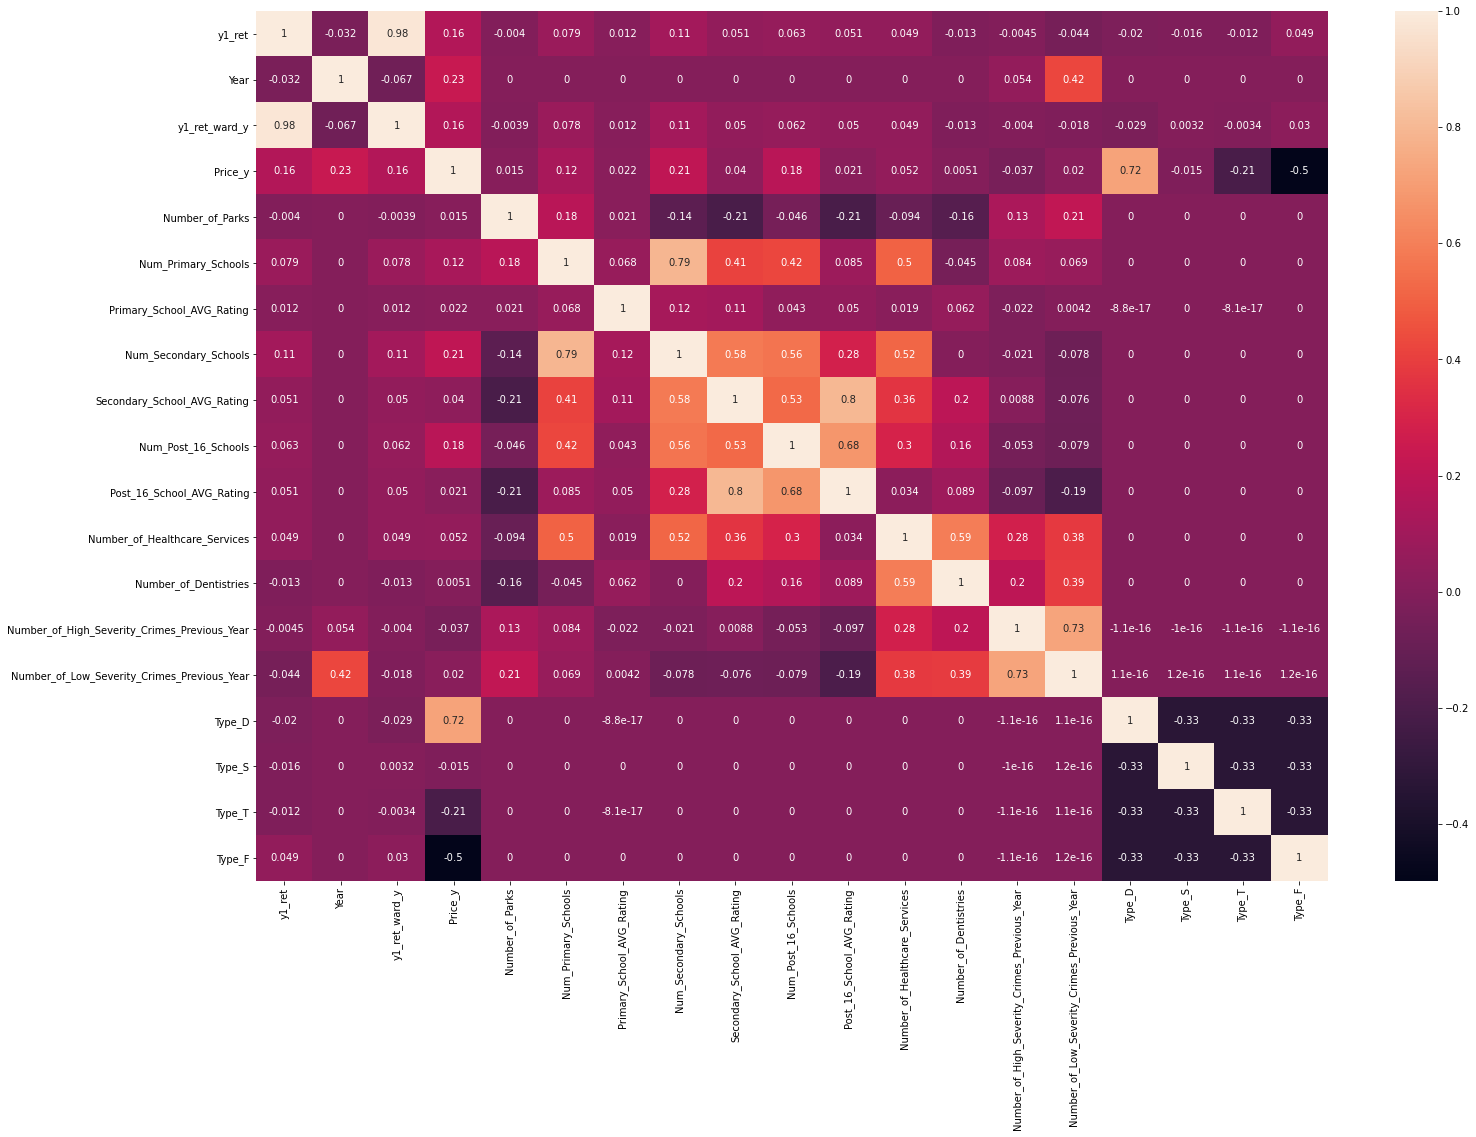

In [19]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*4, Size[1]*4, forward=True)
plt.show()

In [20]:
df.columns

Index(['y1_ret', 'Year', 'y1_ret_ward_y', 'Price_y', 'Number_of_Parks',
       'Num_Primary_Schools', 'Primary_School_AVG_Rating',
       'Num_Secondary_Schools', 'Secondary_School_AVG_Rating',
       'Num_Post_16_Schools', 'Post_16_School_AVG_Rating',
       'Number_of_Healthcare_Services', 'Number_of_Dentistries',
       'Number_of_High_Severity_Crimes_Previous_Year',
       'Number_of_Low_Severity_Crimes_Previous_Year', 'Type_D', 'Type_S',
       'Type_T', 'Type_F'],
      dtype='object')

In [21]:
import statsmodels.formula.api as smf
model2 = smf.ols('y1_ret_ward_y ~ Price_y+ Number_of_Parks+ Num_Primary_Schools+ Primary_School_AVG_Rating+ Num_Secondary_Schools+ Secondary_School_AVG_Rating+ Num_Post_16_Schools+ Post_16_School_AVG_Rating+ Number_of_Healthcare_Services+ Number_of_Dentistries+ Number_of_High_Severity_Crimes_Previous_Year+ Number_of_Low_Severity_Crimes_Previous_Year+ Type_D+ Type_S+ Type_T+ Type_F', data = df).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          y1_ret_ward_y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     5.824
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           1.96e-11
Time:                        19:51:55   Log-Likelihood:                 114.46
No. Observations:                 704   AIC:                            -196.9
Df Residuals:                     688   BIC:                            -124.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.1417      0.037     -3.783      0.000      -0.215      -0.068
Price_y                                       3.779e-07   4.47e-08      8.462      0.000     2.9e-07    4.66e-07
Number_of_Parks                                  0.0002      0.001      0.199      0.843      -0.001       0.002
Num_Primary_Schools                              0.0237      0.015      1.558      0.120      -0.006       0.054
Primary_School_AVG_Rating                        0.0027      0.009      0.286      0.775      -0.016       0.021
Num_Secondary_Schools                           -0.0015      0.018     -0.086      0.932      -0.037       0.034
Secondary_School_AVG_Rating                     -0.0362      0.016     -2.230      0.026      -0.068      -0.004
Num_Post_16_Schools                             -0.0817      0.025     -3.257      0.001      -0.131      -0.032
Post_16_School_AVG_Rating                        0.0602      0.019      3.220      0.001       0.023       0.097
Number_of_Healthcare_Services                    0.0228      0.011      2.141      0.033       0.002       0.044
Number_of_Dentistries                           -0.0012      0.005     -0.241      0.809      -0.011       0.008
Number_of_High_Severity_Crimes_Previous_Year     0.0001   9.94e-05      1.305      0.192   -6.54e-05       0.000
Number_of_Low_Severity_Crimes_Previous_Year  -7.113e-05   4.08e-05     -1.742      0.082      -0.000    9.05e-06
Type_D                                          -0.1988      0.028     -7.150      0.000      -0.253      -0.144
Type_S                                          -0.0311      0.016     -1.898      0.058      -0.063       0.001
Type_T                                           0.0073      0.016      0.466      0.641      -0.024       0.038
Type_F                                           0.0809      0.017      4.638      0.000       0.047       0.115
==============================================================================
Omnibus:                      520.449   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17352.974
Skew:                           2.903   Prob(JB):                         0.00
Kurtosis:                      26.619   Cond. No.                     3.96e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
mse_val = mean_squared_error(y_test, predictions)
mse_val

0.04862089116055035